<a href="https://colab.research.google.com/github/kelvinfoo123/Time-Series-Analysis/blob/main/Introduction_to_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Packages**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

**Import Data**

In [ ]:
data = pd.read_csv("Index2018.csv")

In [ ]:
# Create additional copy of original data 
data_original__copy = data.copy() 

**Examining the Data**

In [ ]:
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [ ]:
data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [ ]:
# Determine number of null values 
data.isna().sum() # No null values 

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

**Plot data**

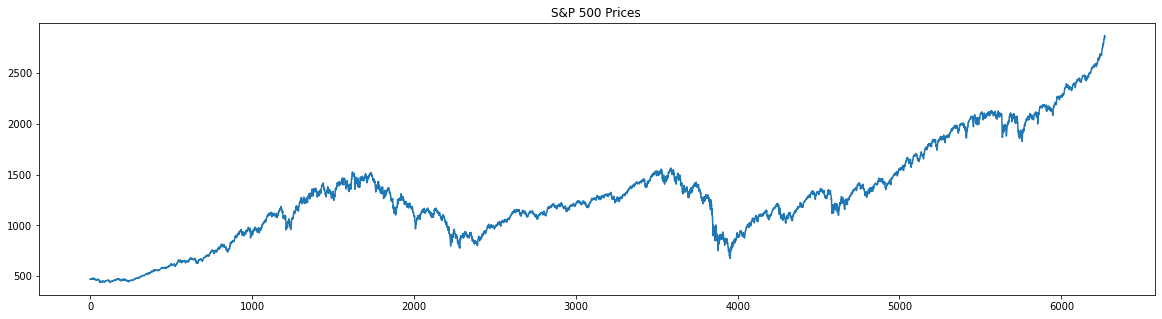

In [ ]:
# Plot spx values 
plt.figure(figsize = (20,5))
data.spx.plot()
plt.title("S&P 500 Prices ")
plt.show()

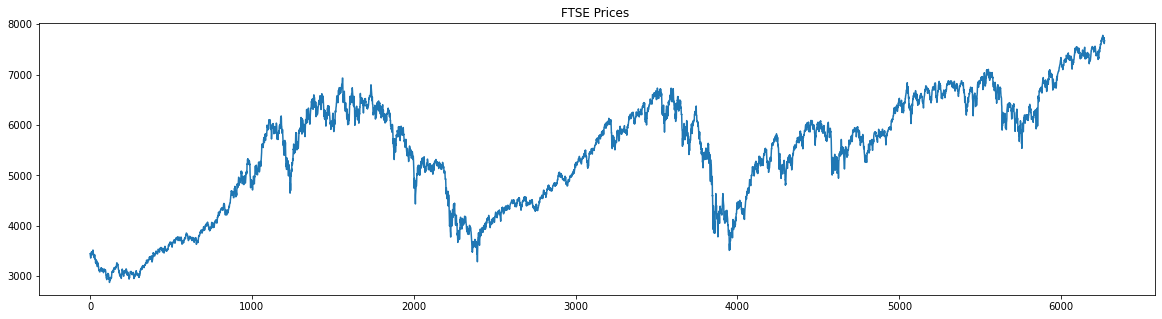

In [ ]:
# Plot ftse values
plt.figure(figsize = (20,5))
data.ftse.plot()
plt.title("FTSE Prices ")
plt.show()

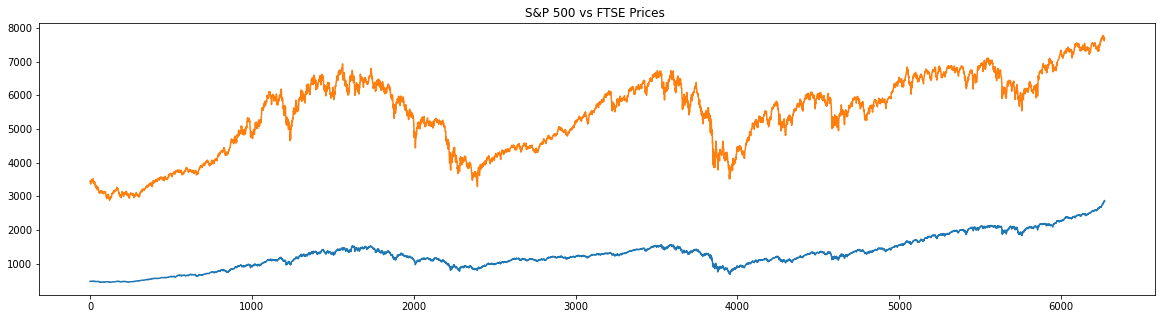

In [ ]:
plt.figure(figsize = (20,5))
data.spx.plot()
data.ftse.plot()
plt.title("S&P 500 vs FTSE Prices ")
plt.show()

**QQ plot**

- Used to determine whether a data set is distributed in a certain way. 
- Usually showcases how the data fits with a normal distribution. 

In [ ]:
import scipy.stats 
import pylab 

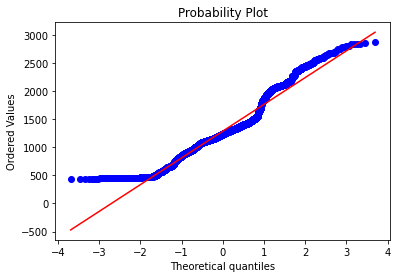

In [ ]:
scipy.stats.probplot(data.spx, plot = pylab)
pylab.show()

# y-axis represent price from lowest to highest. 
# X-axis represent how many standard deviations away from the mean these values are.
# The red line denote what the data points should follow, if they are normally distributed. 

We see that the S&P 500 values do not follow a normal distribution.

**Transform string input into date-time format**

In [ ]:
data.date = pd.to_datetime(data.date, dayfirst = True) # The function assumes that the string is in the format mm/dd/yyyy form.
                                                       # Specify dayfirst = True since our format is dd/mm/yyyy

In [ ]:
data.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


**Set index**

In [ ]:
# Set time period as index 
data.set_index("date", inplace = True)
data.head()

# Allows you to extract value for a specific date by referencing the index date. 

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


**Set frequency**

In [ ]:
data = data.asfreq('d') # h - hourly, w - weekly, d - daily, m - monthly, a - annually, etc 
data.head() # na values because these dates are not in the original data. 

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [ ]:
# Not interested in weekends since stock markets do not operate on weekends 

data = data.asfreq('b') # b - business day (ie. Do not consider weekends)
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


**Handling Missing Values**

In [ ]:
data.isnull().sum() # 8 null values now for each column

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [ ]:
## Some methods to handle na values: 
# Front filling - Assign the value of the previous period 
# Back filling - Assign the value of next period 
# Assign the same value such as the mean. 

data.spx = data.spx.fillna(method = 'ffill') # Front filling 
data.ftse = data.ftse.fillna(method = 'bfill') # Back filling 
data.dax = data.dax.fillna(value = data.dax.mean()) # Fill using the same mean value 

**Splitting the data**

In [ ]:
# Remove all values except spx 
del data["ftse"], data["dax"], data["nikkei"]
data.head()

,spx
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [ ]:
# Find cut off points 
size = int(len(data) * 0.8) # Training set is 80 % of dataset. 

train = data.iloc[:size] # Training set contain all data from start to size. 
test = data.iloc[size:] # Testing set contain all data from size to end. 